In [2]:
#1 - import the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#2 - Load the data
df = pd.read_csv("netflix_titles.csv")
df.head()
#df.info()
#df.desecribe()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,s1,Movie,Netflix Title 1,NaN,"Actor 292, Actor 541",France,"December 15, 2016",1994,TV-MA,Action,This is a movie released in 1994.
1,s2,Movie,Netflix Title 2,NaN,"Actor 295, Actor 858",France,NaN,2020,TV-PG,Comedy,NaN
2,s3,Movie,Netflix Title 3,NaN,NaN,United Kingdom,NaN,1981,NaN,Thriller,This is a movie released in 1981.
3,s4,TV Show,Netflix Title 4,Director 285,"Actor 15, Actor 622",Japan,NaN,2011,G,Thriller,NaN
4,s5,Movie,Netflix Title 5,NaN,"Actor 333, Actor 874",NaN,"December 21, 2019",2024,R,Romance,This is a movie released in 2024.


In [18]:
#clean the data
df = df.dropna(subset = ['type', 'release_year', 'title', 'rating', 'country'])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,s1,Movie,Netflix Title 1,NaN,"Actor 292, Actor 541",France,"December 15, 2016",1994,TV-MA,Action,This is a movie released in 1994.
1,s2,Movie,Netflix Title 2,NaN,"Actor 295, Actor 858",France,NaN,2020,TV-PG,Comedy,NaN
3,s4,TV Show,Netflix Title 4,Director 285,"Actor 15, Actor 622",Japan,NaN,2011,G,Thriller,NaN
5,s6,TV Show,Netflix Title 6,NaN,NaN,Canada,NaN,2024,PG-13,Thriller,NaN
6,s7,TV Show,Netflix Title 7,Director 276,NaN,India,NaN,1982,G,Horror,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8234,s5051,Movie,Netflix Title 5051,Director 135,NaN,United States,"July 08, 2024",1999,R,Documentary,NaN
8235,s4077,Movie,Netflix Title 4077,NaN,"Actor 4, Actor 859",United States,NaN,1988,PG,Action,This is a movie released in 1988.
8236,s3917,TV Show,Netflix Title 3917,Director 7,NaN,France,NaN,2010,PG-13,Documentary,This is a tv show released in 2010.
8237,s545,Movie,Netflix Title 545,NaN,"Actor 56, Actor 619",Japan,"August 22, 2018",1997,R,Drama,NaN


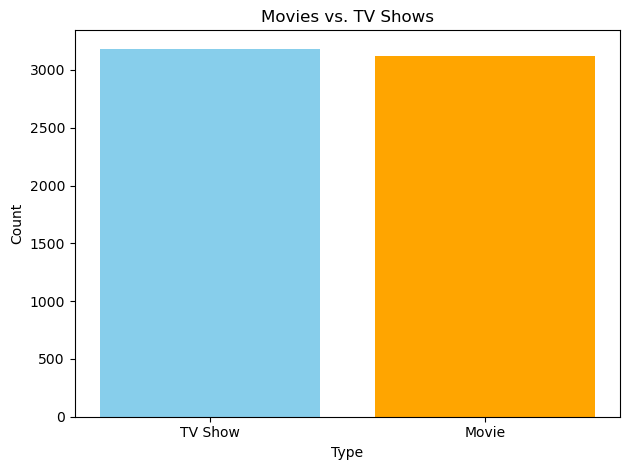

In [22]:
#Movies vs. TV Shows
type_counts = df['type'].value_counts()

plt.bar(type_counts.index, type_counts.values, color=["skyblue", "orange"])
plt.title("Movies vs. TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

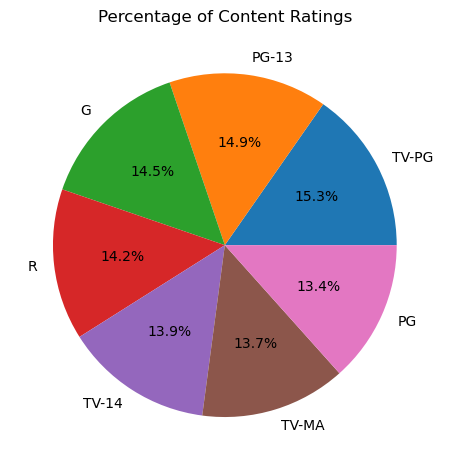

In [30]:
# Rating --> pie chart
rating_counts = df['rating'].value_counts()

plt.pie(rating_counts, labels = rating_counts.index, autopct = "%1.1f%%")
plt.title("Percentage of Content Ratings")
plt.tight_layout()
plt.savefig('content_Ratings_pie.png')
plt.show()

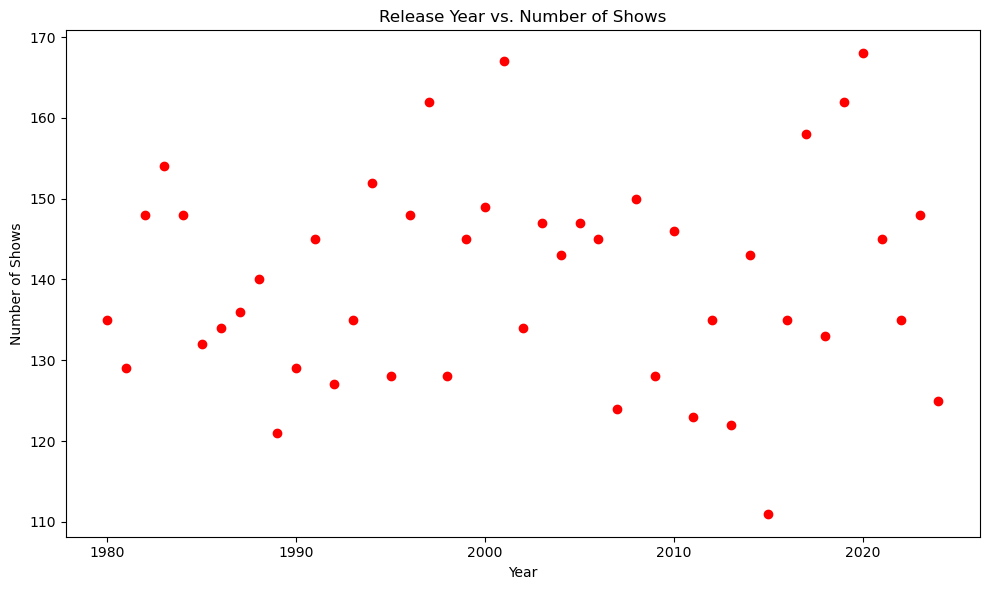

In [35]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize = (10, 6))

plt.scatter(release_counts.index, release_counts.values, color="red")
plt.title("Release Year vs. Number of Shows")
plt.xlabel("Year")
plt.ylabel("Number of Shows")
plt.tight_layout()
plt.savefig("release_year_scatter.png")
plt.show()

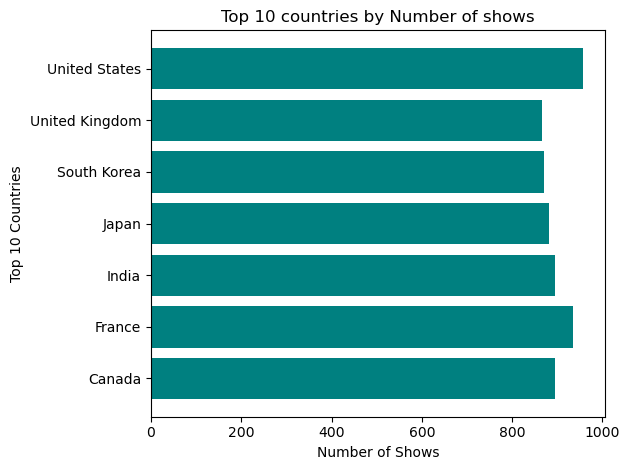

In [43]:
country_counts = df['country'].value_counts().head(10).sort_index()

plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 countries by Number of shows')
plt.xlabel("Number of Shows")
plt.ylabel("Top 10 Countries")
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()

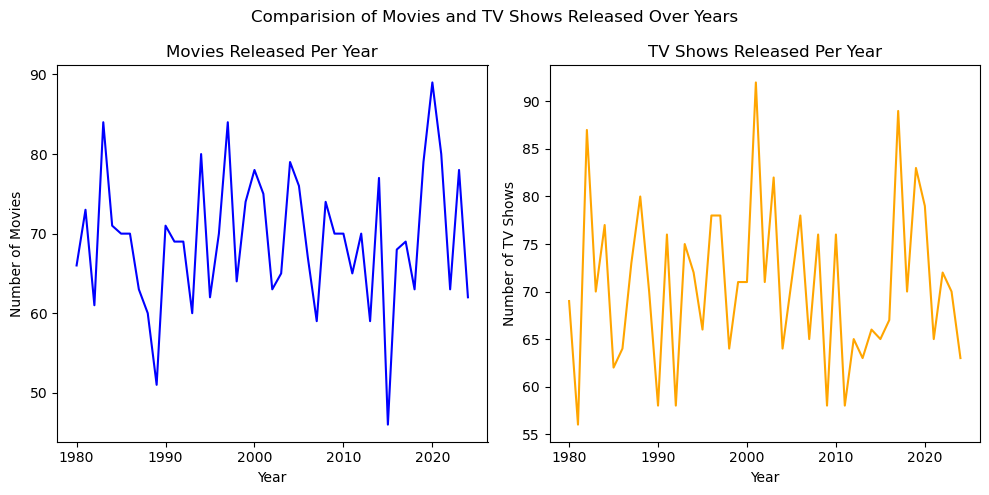

In [56]:
content_by_year = df.groupby(['release_year', 'type']).size().unstack()

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

#first subplot:Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color = 'blue')
ax[0].set_title("Movies Released Per Year")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot:TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color = 'Orange')
ax[1].set_title("TV Shows Released Per Year")
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparision of Movies and TV Shows Released Over Years')

plt.tight_layout()
plt.savefig("movies_tv_shows_comparision.png")
plt.show()